Eric Nguyen

2019-03-21

# 1.04 Graded Assignment: Sampling Distribution of $\hat{p}$

In [2]:
using Distributions, Plots

function distplot(d, N = 0.01, leg = false)
    x_axis = mean(d)-std(d)*4:N:mean(d)+std(d)*4
    plot(x_axis, pdf.(d, x_axis), leg = leg)
end

function probplot(d, X, portion, N = 0.01, leg = false)
    distplot(d, N, leg)
    if portion == :left
        x_axis = mean(d)-std(d)*4:N:X
    elseif portion == :right 
        x_axis = X:N:mean(d)+std(d)*4
    elseif portion == :mid
        x_axis = minimum(X):N:maximum(X)
    end
    plot!(x_axis, pdf.(d, x_axis), fill = (0, 0.5), leg = leg)
end

function z_score(prob)
    return quantile(Normal(0.0, 1.0), 1 - (1 + prob) / 2)
end

z_score (generic function with 1 method)

## The Sampling Distribution of $\hat{p}$

Because $\hat{p}$ is calculated from a count of successes to failures, the distribution of $\hat{p}$ is binomial. You may recall that a binomial distribution of counts has a mean $np$ and a standard deviation $\sqrt{np(1 - p)}$. You may also recall that to turn a count of successes ($x$) into a proportion ($\hat{p}$), you divide the count $x$ by the sample size $n$. Similarly, to turn $np$ and $\sqrt{np(1 - p)}$ into the mean and standard deviation of the proportion $\hat{p}$, divide each term by $n$:

$$\mu_{\hat{p}} = \frac{np}{n} = p, \quad \sigma_{\hat{p}} = \sqrt{\frac{np(1 - p)}{n^2}} = \sqrt{\frac{p(1 - p)}{n}}.$$

So, the mean of the distribution of $\hat{p}$ is $p$, and the standard deviation is $\sqrt{\frac{p(1 - p)}{n}}.$

Note that the term $(1 - p)$, which is the proportion or probability of failure, is written as $q$ in many textbooks. So you may see the standard deviation written as $\sqrt{\frac{pq}{n}}.$

## Using the Normal Approximation

When the population is large relative to the sample, and when $np \geq 10$ and $n(1 - p) \geq 10$, a binomial distribution can be approximated by a normal distribution. This rule applies to the distribution of $\hat{p}$. When conditions are met, it has a distribution $N\left(p, \sqrt{\frac{p(1 - p)}{n}}\right).$

**NOTE:** Some textbooks say you can use the normal approximation if $np > 5$ and $nq$ (or $n(1 - p)$) is $> 5$. These are also valid criteria, but for this Assignment use the criteria $np \geq 10$ and $n(1 - p) \geq 10$.

## The Continuity Correction

The normal approximation to the distribution of $\hat{p}$ uses a continuous distribution to model a discrete one. Use the continuity correction to offset the error inherent in these situations. To do this, simply proceed as though the interval you're finding also occupies the space 0.5 below the lower bound and 0.5 above the upper bound of the interval.

When using the continuity correction for $\hat{p}$, you need to convert your sample proportions to counts, and then use the normal approximation of these counts. For example, let's say the proportion of people who will vote for candidate A is 0.7. You draw a sample of 100 people, and your expected count of successes in a sample (which is the mean of your distribution of counts) is 0.7(100) = 70. You want the probability that you'd get a sample with between 66 and 68 successes. To use the continuity correction in this scenario, you'd find the normal probability for the interval from 65.5 to 68.5.

**NOTE:** As you advance into doing statistical inference, you may not see the continuity correction very often. In many cases it doesn't make enough of a difference to change your result.

## Using your Calculator for the Normal Approximation to $\hat{p}$

Use `normalcdf(lowerbound, upperbound, mean, standard_deviation)`.

- $P\left(\hat{p} > p\right) = \text{normalcdf}(p, 10^{99}, \mu, \sigma)$

- $P\left(\hat{p} < p\right) = \text{normalcdf}(-10^{99}, p, \mu, \sigma)$ Note that you can use any large number in place of $10^{99}.$

- $P\left(p_1 < \hat{p} < p_2\right) = \text{normalcdf}(p_1, p_2, \mu, \sigma)$

**NOTE:** If you don't enter the mean and standard deviation, the calculator assumes a standard normal distribution with a mean 0 and a standard distribution 1. In that case, you can enter $z$-scores. On your calculator, that'd be `normalcdf(lower_z, upper_z)`.

## Assignment Questions

Answer each question completely and send your work back to your instructor. Show all work. Justify your answers clearly and completely with formulas and numerical solutions. Showing your work will allow your instructor to give you partial credit if you make a mistake but show that you still understand the problem.

1. In a survey, 600 mothers and fathers were asked about the importance of sports for boys and girls. Of the parents interviewed, 70% said the genders are equal and should have equal opportunities to participate in sports.

**A. What are the mean, standard deviation, and shape of the distribution of the sample proportion $\hat{p}$ of parents who say the genders are equal and should have equal opportunities? Be sure to justify your answer for the shape of the distribution. Use $n = 600$.** (1 point)

In [7]:
n = 600
p = 0.7
μ = n * p
σ = sqrt((p * (1 - p)) / n)
d = Normal(μ, σ)

Normal{Float64}(μ=420.0, σ=0.01870828693386971)

In [8]:
(n * p >= 10) && (n * (1 - p) >= 10)

true

- $\mu = 420$
- $\sigma \approx 0.0187$
- Normal distribution, as $np \geq 10$ and $n(1 - p) \geq 10$ both evaluate to true.

**B. Using the normal approximation without the continuity correction, sketch the probability distribution curve for the distribution of $\hat{p}$. Shade equal areas on both sides of the mean to show an area that represents a probability of $0.95$, and label the upper and lower bounds of the shaded area as values of $\hat{p}$ (not $z$-scores). Show your calculations for the upper and lower bounds.** (2 points)

In [51]:
Z = z_score(0.95)
X = (mean(d) - std(d) * Z, mean(d) + std(d) * Z)
cutoff = cdf.(d, X)

(0.9749999999999467, 0.0250000000000533)

In [52]:
cutoff[2] - cutoff[1]

-0.9499999999998934

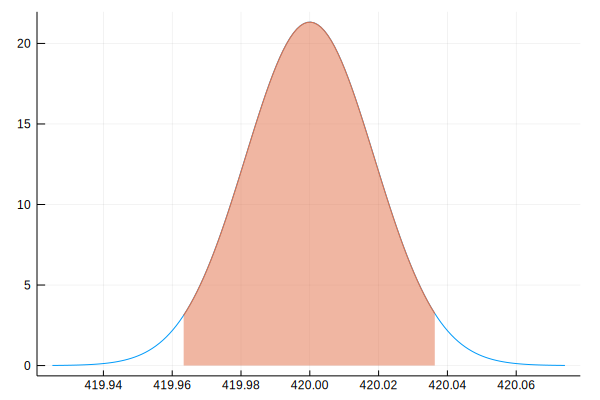

In [53]:
probplot(d, X, :mid, 0.001)

**C. Considering the sketch in part B, the shaded area shows a 0.95 probability of what happening? In other words, what does the probability of 0.95 represent?** (2 points)

- The probability of 0.95 represents the number of mothers and fathers saying genders are equal.

**D. Using the normal approximation, what's the probability a randomly drawn sample of parents of size 600 will have a sample proportion between 67% and 73%? Draw a sketch of the probability curve, shade the area representing the probability you're finding, and label the $z$-scores that represent the upper and lower bounds of the probability you're finding. Don't use the continuity correction.** (2 points)

In [54]:
Z = (z_score(0.67), z_score(0.73))
X = (mean(d) - std(d) * Z[1], mean(d) - std(d) * Z[2])
cutoff = cdf.(d, X)

(0.8349999999997368, 0.8650000000002644)

In [55]:
cutoff[2] - cutoff[1]

0.030000000000527605

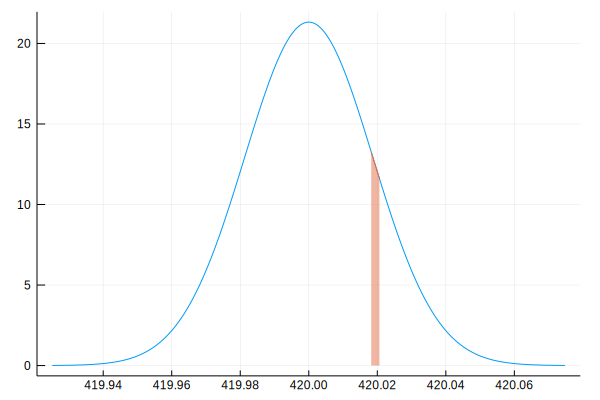

In [56]:
probplot(d, X, :mid, 0.0001)

**E. Now, use the exact binomial calculation to find the probability of getting between, but not including, 67% and 73% of the respondents in a sample of 600 who say the genders are equal and should have equal opportunities. To use the exact binomial, you'll need to convert the proportions to counts by multiplying each proportion by 600.** (1 point)

In [5]:
d = Binomial(600, 0.7)
cdf(d, 600 * 0.73) - cdf(d, 600 * 0.67)

0.8910093555343249